# WeatherPy
----

### **Part 1: WeatherPy**

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-40, 60)
lng_range = (-180, 180)

## Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=6400)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=6400)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['hilo', 'bengkulu', 'ulladulla', 'lebu', 'port hedland', 'atuona', 'beringovskiy', 'bambous virieux', 'walajapet', 'tanete', 'lingao', 'hithadhoo', 'ferreira do alentejo', 'umzimvubu', 'takoradi', 'muros', 'adrar', 'alice springs', 'salalah', 'tsihombe', 'brownsville', 'lasa', 'los llanos de aridane', 'pontes e lacerda', 'vaitupu', 'garissa', 'hobbs', 'teknaf', 'quarai', 'severo-kurilsk', 'taolanaro', 'ugoofaaru', 'puerto ayora', 'ribeira grande', 'san cristobal', 'kavaratti', 'marienburg', 'amarwara', 'hovd', 'naze', 'grand gaube', 'olga', 'vanimo', 'elena', 'palana', 'san quintin', 'thompson', 'baruun-urt', 'sao filipe', 'san miguel', 'xai-xai', 'port augusta', 'dorado', 'nanortalik', 'provideniya', 'alvinopolis', 'ponta do sol', 'airai', 'ishigaki', 'muisne', 'lata', 'ambon', 'trinidad', 'chemal', 'lagoa', 'lima', 'saint george', 'muli', 'jamestown', 'busselton', 'cayenne', 'asmara', 'rikitea', 'hasaki', 'papara', 'chicama', 'marsh harbour', 'nouadhibou', 'makakilo city', 'lebediny

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [103]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through 

# set up lists to hold reponse info
lat      = []
long     = []
temp     = []
temp_min = []
temp_max = []
humid    = []
cloud    = []
wind_sp  = []
country  = []
name     = []
# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    
    lat.append(response['coord']['lat'])
    long.append(response['coord']['lon'])
    temp.append(response['main']['temp'])
    temp_min.append(response['main']['temp_min'])
    temp_max.append(response['main']['temp_max'])
    humid.append(response['main']['humidity'])
    cloud.append(response['clouds']['all'])
    wind_sp.append(response['wind']['speed'])
    country.append(response['sys']['country'])
    name.append(response['name'])
    print(response['name'])
    

Hilo
Bengkulu
Ulladulla
Lebu
Port Hedland
Atuona
Beringovskiy
Bambous Virieux
Walajapet
Tanete
Lingao
Hithadhoo
Ferreira do Alentejo


KeyError: 'coord'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [104]:
cities_df = pd.DataFrame({
    'City'       : name,
    'Country'    : country,
    'Latitude'   : lat,
    'Longitude'  : long,
    'Temperature': temp,
    'Max Temperature': temp_max,
    'Min Temperature': temp_min,
    'Humidity'   : humid,
    'Cloudiness' : cloud,
    'Wind Speed' : wind_sp
    })

cities_df.to_csv(output_data_file)
cities_df

,City,Country,Latitude,Longitude,Temperature,Max Temperature,Min Temperature,Humidity,Cloudiness,Wind Speed
0,Hilo,US,19.7297,-155.0900,28.37,28.85,26.45,70,0,5.14
1,Bengkulu,ID,-3.8004,102.2655,23.93,23.93,23.93,89,100,1.71
2,Ulladulla,AU,-35.3500,150.4667,23.33,23.33,23.33,62,45,1.11
3,Lebu,CL,-37.6167,-73.6500,10.86,10.86,10.86,93,100,0.12
4,Port Hedland,AU,-20.3167,118.5667,29.03,29.03,29.03,30,0,6.69
5,Atuona,PF,-9.8000,-139.0333,24.82,24.82,24.82,72,0,7.60
6,Beringovskiy,RU,63.0500,179.3167,-1.45,-1.45,-1.45,79,100,1.74
7,Bambous Virieux,MU,-20.3428,57.7575,20.14,21.23,20.14,83,75,2.57
8,Walajapet,IN,12.9333,79.3833,20.02,20.02,20.02,63,7,2.32
9,Tanete,ID,-3.9443,119.7848,29.82,29.82,29.82,72,98,0.58


## Plotting the Data

### Latitude vs. Temperature Plot

As expected, the temperature increases as you move towards the equator and decreases as you move away from it.

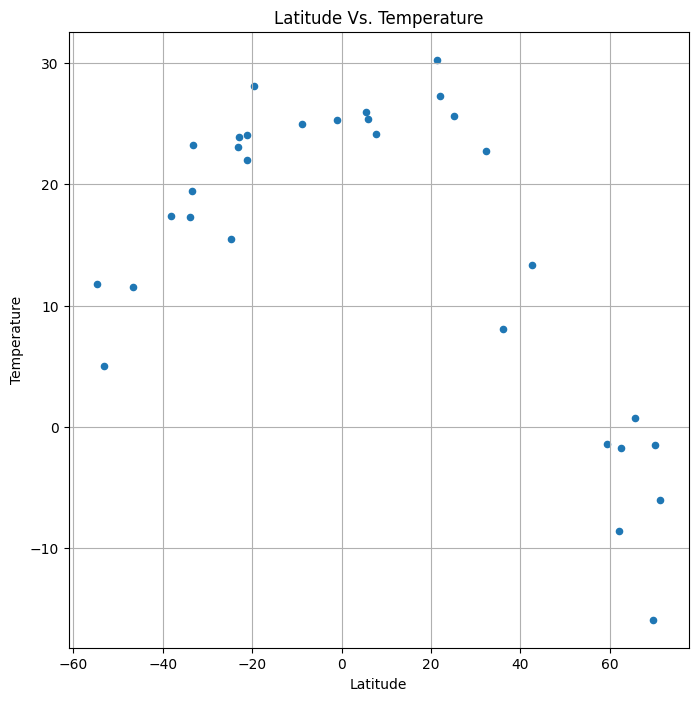

In [71]:
cities_df.plot(kind="scatter", x="Latitude", y="Temperature", grid=True, figsize=(8,8),
              title="Latitude Vs. Temperature")
plt.show()

After each plot, add one to two sentences to explain what the code is analyzing

## Latitude vs. Humidity Plot

There doesn't seem to be a relationship between latitude and humidity.

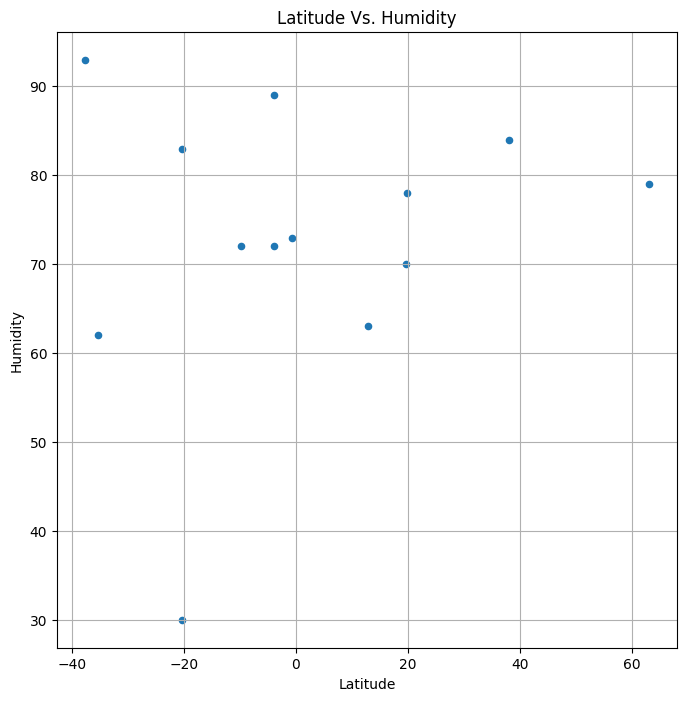

In [106]:
cities_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Latitude Vs. Humidity")
plt.show()

## Latitude vs. Cloudiness Plot

There doesn't seem to be a relationship between latitude and cloudiness.

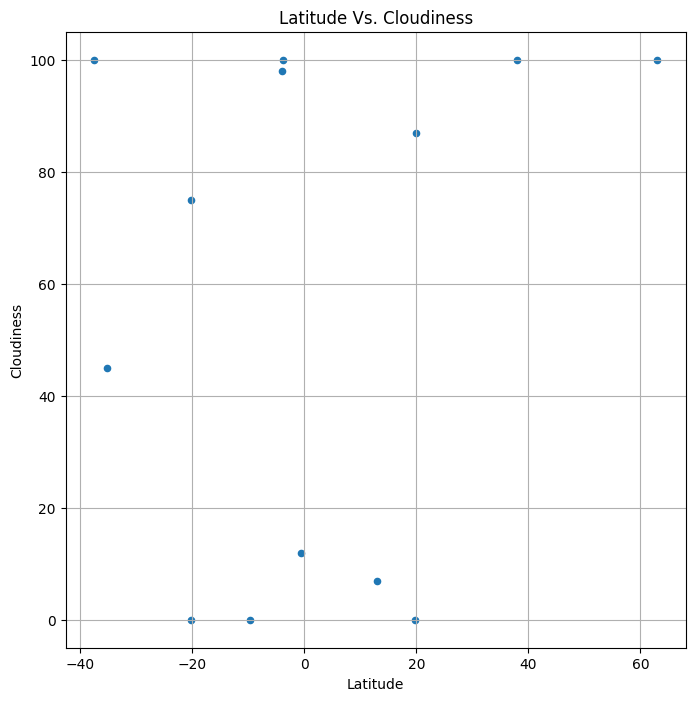

In [107]:
cities_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="Latitude Vs. Cloudiness")
plt.show()

## Latitude vs. Wind Speed Plot

There doesn't seem to be a relationship between latitude and wind speed.

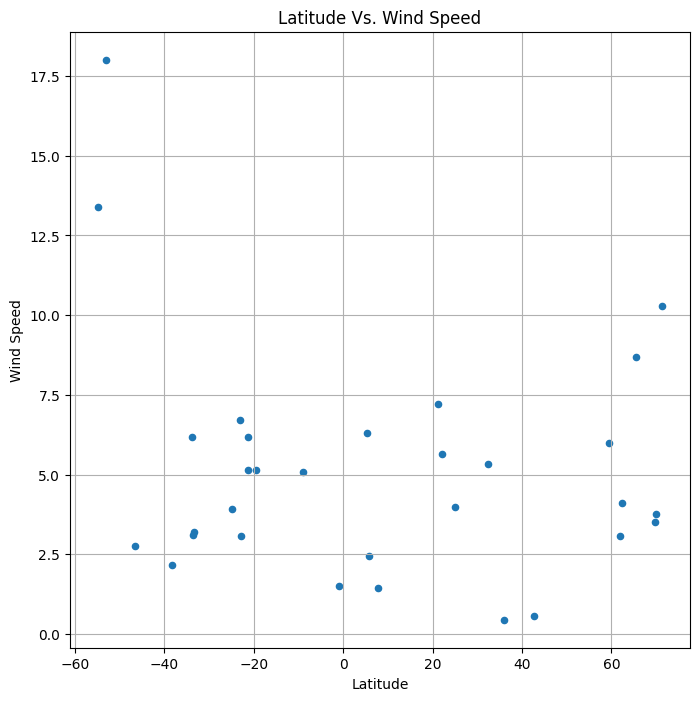

In [74]:
cities_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8),
              title="Latitude Vs. Wind Speed")
plt.show()

## Linear Regression

In [108]:
north_df = cities_df.loc[cities_df['Latitude']>0]
south_df = cities_df.loc[cities_df['Latitude']<0]

### Max Temp vs. Latitude Linear Regression

In both hemispheres, the temperature increases as you get closer to the equator.

####  Northern Hemisphere

The r-squared is: 0.8259330797983726


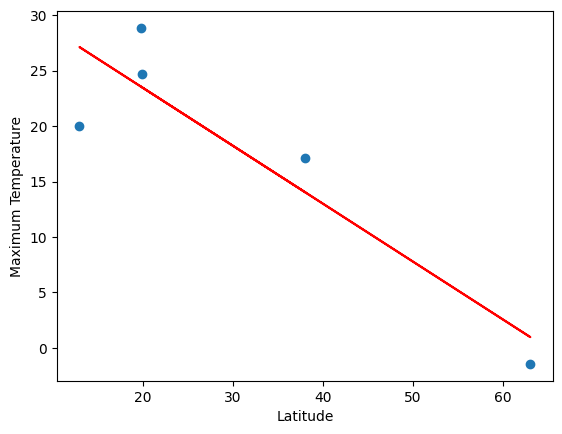

In [109]:
x_values = north_df['Latitude']
y_values = north_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.7172793109539953


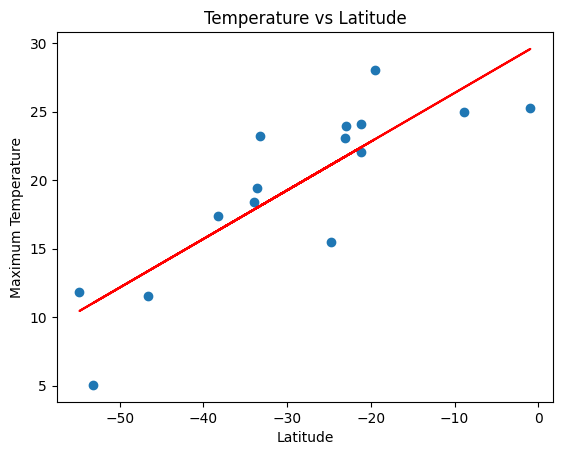

In [77]:
x_values = south_df['Latitude']
y_values = south_df['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
plt.title('Temperature vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Humidity (%) vs. Latitude Linear Regression

The relationship between humidity and latitude seems to be stronger in the Southern Hemisphere than in the North.

####  Northern Hemisphere

The r-squared is: 0.40946273238446684


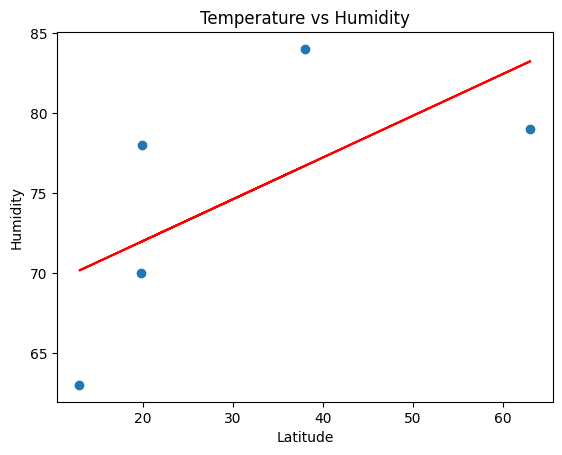

In [110]:
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.00229316243777616


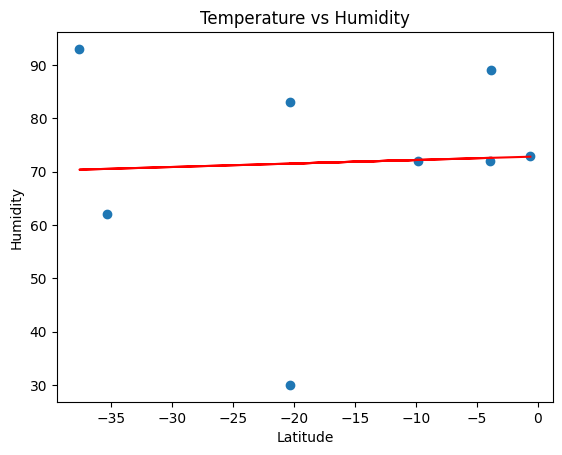

In [111]:
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Temperature vs Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Cloudiness (%) vs. Latitude Linear Regression

The relationship between latitude and cloudiness seems to be stronger in the Nothern Hemisphere than in the South.

####  Northern Hemisphere

The r-squared is: 0.4913857451244389


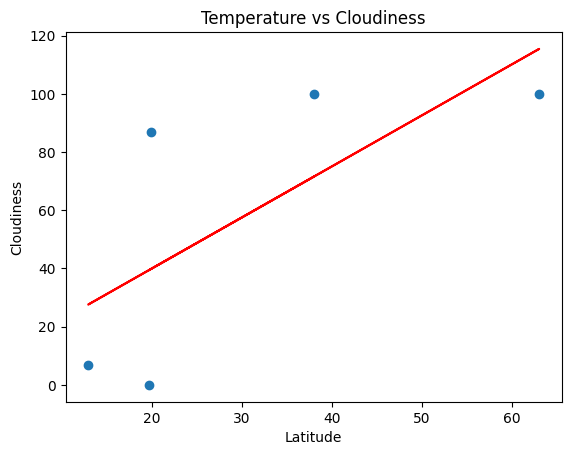

In [112]:
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Temperature vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.01567283352949215


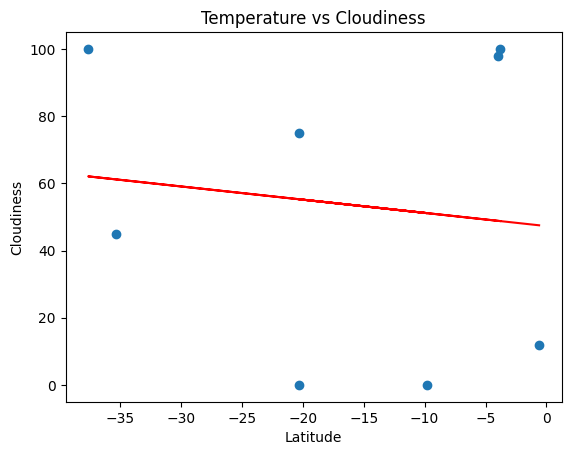

In [113]:
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Temperature vs Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

### Wind Speed (mph) vs. Latitude Linear Regression

There seems to be a weak relationship between latitude and wind speed.

####  Northern Hemisphere

The r-squared is: 0.06782105208015848


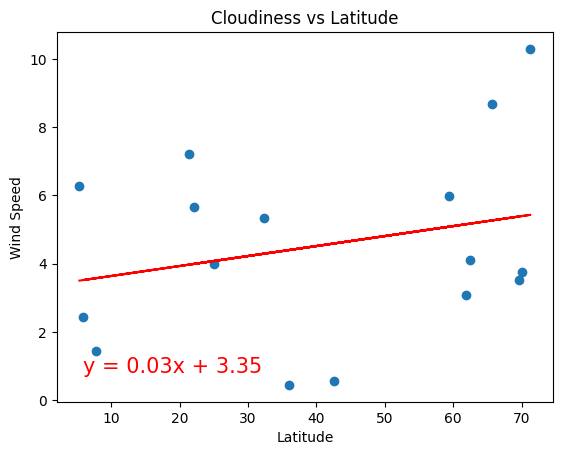

In [82]:
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Cloudiness vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere

The r-squared is: 0.3370525264125364


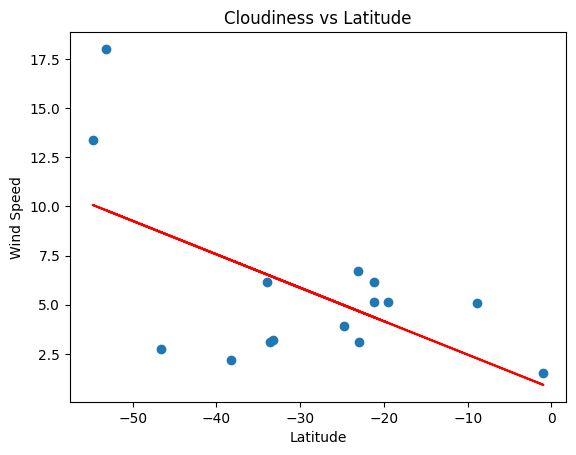

In [83]:
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Cloudiness vs Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()